In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
y_train=train['target']
x_train=train[['id','keyword','location','text']]

In [6]:
x_train.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [7]:
train[train['target']==1]['keyword'].value_counts() #outbreak,derailment,wreckage,debris가 많음
#살인,태풍,기름 낭비,폭탄 등..

outbreak                 39
wreckage                 39
derailment               39
oil%20spill              37
debris                   37
typhoon                  37
suicide%20bombing        32
rescuers                 32
evacuated                32
suicide%20bomb           32
nuclear%20disaster       31
razed                    31
earthquake               30
airplane%20accident      30
suicide%20bomber         30
wildfire                 29
bridge%20collapse        29
collision                29
sandstorm                28
casualties               28
buildings%20on%20fire    28
drought                  28
mass%20murder            28
evacuation               28
wild%20fires             27
devastation              27
sinkhole                 27
bombing                  27
hostages                 27
forest%20fires           27
                         ..
crush                     4
obliterate                4
obliteration              4
harm                      4
avalanche           

In [8]:
train[train['target']==1]['location'].value_counts() #미국에서 많이 발생함

USA                                 67
United States                       27
Nigeria                             22
India                               20
Mumbai                              19
UK                                  16
New York                            16
London                              16
Washington, DC                      15
Canada                              13
Worldwide                           12
Chicago, IL                          9
Australia                            9
Washington, D.C.                     9
Los Angeles, CA                      8
Earth                                8
California, USA                      8
Indonesia                            8
Los Angeles                          7
California                           7
Nashville, TN                        7
Toronto                              7
San Francisco, CA                    7
New York, NY                         7
Sacramento, CA                       7
San Francisco            

In [9]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [10]:
import re
def text_processing(textset):
    texts=[]
    for i in textset:
        j=i.split(' ')
        sentence=' '.join(word for word in j if len(word)>1 if word not in stop_words)
        sentence=re.sub('https*://*.+/*[a-zA-Z0-9]*','',sentence) #하이퍼링크 제거
        sentence=re.sub('[^a-zA-Z]',' ',sentence) #특수기호,숫자 제거
        sentence=re.sub('\s+',' ',sentence)#공백이 1개 이상을 하나의 공백으로 처리
        sentence=sentence.strip(' ')#앞뒤 공백 제거
        texts.append(sentence)
    return texts

In [11]:
texts=text_processing(x_train['text'])

In [12]:
x_train['texts']=texts

In [13]:
x_train.head()

,id,keyword,location,text,texts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds Reason earthquake May ALLAH Forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked shelter place notified off...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders Cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent photo Ruby Alaska smoke wildfire...


## XGBoost 버전

In [14]:
x_train=train[['keyword','location','text']]
texts=text_processing(x_train['text'])
x_train['texts']=texts

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train['texts'].values)

Using TensorFlow backend.
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [16]:
x_train = tokenizer.texts_to_matrix(x_train['texts'], mode='count')
x_train.shape

(7613, 10000)

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=3,
                    num_class=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    seed=27)

In [18]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=None, subsample=0.8, verbosity=1)

In [20]:
test_texts=text_processing(test['text'])
test['texts']=test_texts
test_tokenizer=Tokenizer(num_words=10000)
test_tokenizer.fit_on_texts(test['texts'].values)
print(len(test_tokenizer.word_index))

9495


In [21]:
x_test = tokenizer.texts_to_matrix(test_texts, mode='count')

In [22]:
pred=xgb.predict(x_test)

In [27]:
submission=submit.copy()
submission['target']=pred
submit.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


## 로지스틱 회귀 버전

In [62]:
x_train=train[['keyword','location','text']]
texts=text_processing(x_train['text'])
x_train['texts']=texts

In [63]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train['texts'].values)

In [68]:
print(len(tokenizer.word_index))

15641


In [69]:
x_train = tokenizer.texts_to_matrix(x_train['texts'], mode='count')
x_train.shape

(7613, 15642)

In [70]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
test_texts=text_processing(test['text'])
test['texts']=test_texts
test_tokenizer=Tokenizer()
test_tokenizer.fit_on_texts(test['texts'].values)
print(len(test_tokenizer.word_index))

In [72]:
x_test = tokenizer.texts_to_matrix(test_texts, mode='count')

In [73]:
test['final']=logistic.predict(x_test)

In [74]:
test.head()

,id,keyword,location,text,texts,final,target
0,0,NaN,NaN,Just happened a terrible car crash,Just happened terrible car crash,1,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe ev...,1,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...,1,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,0,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills China Taiwan,1,0


In [75]:
test['final'].value_counts()

0    2085
1    1178
Name: final, dtype: int64

In [78]:
submission=submit.copy()
submission['target']=test['final']
submission.to_csv('logistic_tweets.csv',index=False)

## TFIDF 버전

In [12]:
x_train=train[['id','keyword','location','text']]
texts=text_processing(x_train['text'])
x_train['texts']=texts

In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train['texts'].values)

Using TensorFlow backend.
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [14]:
x_train = tokenizer.texts_to_matrix(x_train['texts'], mode='tfidf')

In [15]:
x_train.shape

(7613, 10000)

In [16]:
from keras import layers
from keras.layers import Dense,Embedding,Dropout,BatchNormalization
from keras.models import Sequential
model=Sequential()
model.add(Dense(128, activation='relu',input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
hist=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 6090 samples, validate on 1523 samples
Epoch 1/10
6090/6090 [==============================] - 5s 754us/step - loss: 0.6528 - acc: 0.6885 - val_loss: 0.5189 - val_acc: 0.7656
Epoch 2/10
6090/6090 [==============================] - 3s 422us/step - loss: 0.3061 - acc: 0.8795 - val_loss: 0.5202 - val_acc: 0.7643
Epoch 3/10
6090/6090 [==============================] - 3s 422us/step - loss: 0.1929 - acc: 0.9338 - val_loss: 0.5503 - val_acc: 0.7676
Epoch 4/10
6090/6090 [==============================] - 3s 432us/step - loss: 0.1494 - acc: 0.9506 - val_loss: 0.6270 - val_acc: 0.7498
Epoch 5/10
6090/6090 [==============================] - 3s 427us/step - loss: 0.1238 - acc: 0.9593 - val_loss: 0.6516 - val_acc: 0.7617
Epoch 6/10
6090/6090 [===============

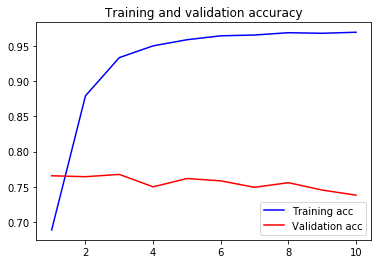

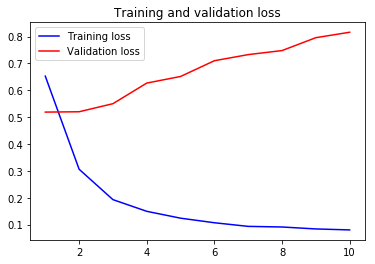

In [17]:
import matplotlib.pyplot as plt
loss=hist.history['loss']
val_loss=hist.history['val_loss']
acc=hist.history['acc']
val_acc=hist.history['val_acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_texts=text_processing(test['text'])
test['texts']=test_texts

In [19]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(test['texts'].values)
x_test = tokenizer.texts_to_matrix(test_texts, mode='tfidf')

In [20]:
test['final']=model.predict_classes(x_test)

In [21]:
test.head()

,id,keyword,location,text,texts,final
0,0,NaN,NaN,Just happened a terrible car crash,Just happened terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe ev...,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...,0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills China Taiwan,1


In [22]:
test['final'].value_counts()

0    1869
1    1394
Name: final, dtype: int64

In [23]:
submit.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [24]:
submit['target']=test['final']

In [25]:
submit.to_csv('disaster.csv',index=False)

## lstm_model ver

In [35]:
x_train=train[['id','keyword','location','text']]
texts=text_processing(x_train['text'])
x_train['texts']=texts

In [36]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train['texts'].values)

In [37]:
encoded=tokenizer.texts_to_sequences(x_train['texts'].values)
encoded

[[565, 4232, 767, 284, 78, 1482, 4233, 36],
 [137, 7, 164, 656, 6265, 6266, 1375],
 [79, 1621, 1483, 1790, 657, 6267, 1622, 82, 204, 1790, 657, 1285, 1050],
 [13, 4234, 1484, 204, 1285, 33],
 [126, 41, 1195, 274, 6268, 1623, 205, 1484, 6269, 127],
 [2701, 353, 33, 1286, 768, 6270, 496, 1051, 354, 7, 6271, 1484],
 [156, 17, 769, 217, 1109, 770, 206, 1624, 6272, 942, 2275, 1376],
 [3, 6, 165, 1791, 55, 7, 4235],
 [66, 1, 18, 204, 1196, 546, 771, 658],
 [3, 6, 2276, 452, 235, 199],
 [497, 13, 566, 207, 377, 567],
 [772,
  475,
  2702,
  173,
  2703,
  3306,
  611,
  585,
  134,
  10,
  475,
  2702,
  49,
  378,
  261,
  226,
  49,
  378,
  261,
  226,
  6273,
  206],
 [2704, 206, 1792, 6274, 2702, 521, 3, 106, 680, 3307],
 [156, 4236, 806, 19, 1485, 4236],
 [176, 127, 379, 2705, 73, 44, 275],
 [49, 1, 40],
 [56, 4237],
 [262, 1997],
 [27, 73, 681],
 [49, 6275],
 [2706],
 [885, 476],
 [56, 6276],
 [49, 2277, 37],
 [6277],
 [82, 97, 3, 42, 8, 1793, 166],
 [682, 1197, 96, 304],
 [56, 1998],


In [38]:
x_train['texts'].values

array(['Our Deeds Reason earthquake May ALLAH Forgive us',
       'Forest fire near La Ronge Sask Canada',
       'All residents asked shelter place notified officers No evacuation shelter place orders expected',
       ..., 'M UTC km Volcano Hawaii',
       'Police investigating e bike collided car Little Portugal E bike rider suffered serious non life threatening injuries',
       'The Latest More Homes Razed Northern California Wildfire ABC News'],
      dtype=object)

In [39]:
print(max(len(i) for i in encoded)) #가장 긴 단어길이
print(min(len(i) for i in encoded)) #가장 짧은 단어길이
print(sum(len(i) for i in encoded)/len(encoded))#단어길이 평균

26
0
9.096939445685013


In [40]:
print(len(tokenizer.word_index)) #단어의 수

15641


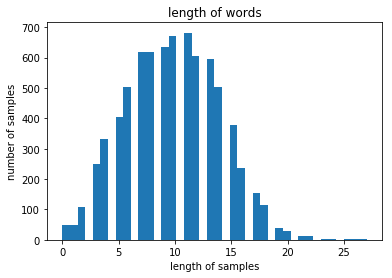

In [41]:
import matplotlib.pyplot as plt
text_len=[len(i.split()) for i in texts]
plt.title('length of words')
plt.hist(text_len,bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
max_len=max(len(item) for item in encoded)
print(max_len)

26


In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
x_train=pad_sequences(encoded)
x_train.shape

(7613, 26)

In [45]:
from keras import layers
from keras.layers import Dense,Embedding,Dropout,BatchNormalization
from keras.models import Sequential
lstm_model=Sequential()
lstm_model.add(Embedding(10000,64,input_length=x_train.shape[1]))
lstm_model.add(layers.LSTM(32))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
hist=lstm_model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/10
6090/6090 [==============================] - 5s 769us/step - loss: 0.5746 - acc: 0.6982 - val_loss: 0.5537 - val_acc: 0.7518
Epoch 2/10
6090/6090 [==============================] - 2s 279us/step - loss: 0.3759 - acc: 0.8420 - val_loss: 0.9936 - val_acc: 0.6783
Epoch 3/10
6090/6090 [==============================] - 2s 290us/step - loss: 0.2767 - acc: 0.8908 - val_loss: 1.6050 - val_acc: 0.5975
Epoch 4/10
6090/6090 [==============================] - 2s 273us/step - loss: 0.2207 - acc: 0.9167 - val_loss: 0.8859 - val_acc: 0.7321
Epoch 5/10
6090/6090 [==============================] - 2s 277us/step - loss: 0.1805 - acc: 0.9325 - val_loss: 0.6599 - val_acc: 0.7544
Epoch 6/10
6090/6090 [==============================] - 2s 274us/step - loss: 0.1527 - acc: 0.9452 - val_loss: 0.7668 - val_acc: 0.7479
Epoch 7/10
6090/6090 [==============================] - 2s 301us/step - loss: 0.1358 - acc: 0.9502 - val_loss: 0.9923 - val_acc: 0.7262


In [46]:
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 64)            640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 652,577
Trainable params: 652,513
Non-trainable params: 64
_________________________________________________________________


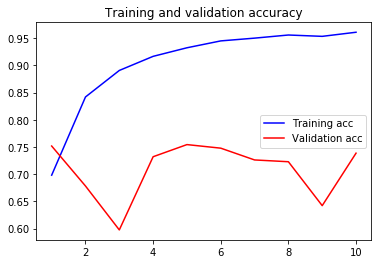

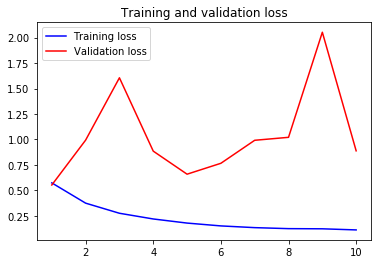

In [47]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
acc=hist.history['acc']
val_acc=hist.history['val_acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
texts=text_processing(test['text'])

In [49]:
test['texts']=texts

In [50]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(test['texts'].values)
encoded=tokenizer.texts_to_sequences(test['texts'].values)

In [51]:
x_test=pad_sequences(encoded)
x_test

array([[   0,    0,    0, ...,  893,   76,   48],
       [   0,    0,    0, ...,  735,  809,  368],
       [   0,    0,    0, ...,  454, 1183,  369],
       ...,
       [   0,    0,    0, ...,  240,  649,  922],
       [   0,    0,    0, ...,  313, 2280, 2281],
       [   0,    0,    0, ...,   22,  228, 3304]])

In [52]:
x_test.shape

(3263, 26)

In [53]:
test['target']=lstm_model.predict_classes(x_test)

In [54]:
test['target'].shape

(3263,)

In [55]:
test_values=test['target'].values

In [56]:
test_values

array([1, 0, 1, ..., 0, 0, 0])

In [57]:
submission=submit.copy()

In [58]:
submission['target']=test_values

In [59]:
submission['target'].value_counts()

0    2282
1     981
Name: target, dtype: int64

In [60]:
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,0


In [61]:
submit.to_csv('sampleSubmission_1.csv', index=False)